In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import tensorflow as tf
import numpy as np
import sys

from PIL import Image
import matplotlib.pyplot as plt
from scipy.misc import imresize
%matplotlib inline

/Users/pmal252d/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [25]:
from tensorflow.contrib import slim
from tensorflow.contrib.slim import nets
from tensorflow.contrib import lookup

In [3]:
IMG_HEIGHT = 299
IMG_WIDTH = 299
IMG_CHANNELS = 3

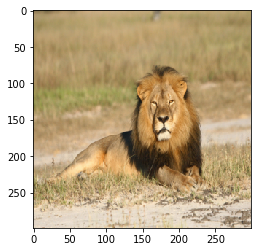

In [19]:
image = Image.open('images/lion.jpg')
image = imresize(image, [IMG_WIDTH, IMG_HEIGHT], )
image = (np.array(image) / 255.).astype(np.float32)

plt.imshow(image)

In [45]:
tf.reset_default_graph()
tf_image = tf.placeholder(tf.float32, shape=[None, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS])
# tf_image = tf.placeholder(tf.float32, shape=[None, None, None, IMG_CHANNELS])
# tf_processed_image = preprocessing_fn(tf_image, IMG_HEIGHT, IMG_WIDTH)
# tf_processed_image = tf.expand_dims(tf_processed_image, axis=0)
with slim.arg_scope(nets.inception.inception_v3_arg_scope()):
    tf_logits, tf_endpoints = nets.inception.inception_v3(tf_image, 
                                                          is_training=False, 
                                                          num_classes=1001)
    
table = lookup.index_to_string_table_from_tensor(
    tf.constant(open('./model/synset_words.txt').readlines()))
tf_top5_logits, tf_top5_indices = tf.nn.top_k(logits, k=5)
tf_top5_indices = tf.to_int64(tf_top5_indices)
tf_top5_class_names = table.lookup(tf_top5_indices-1) # one-based rather than zero

In [46]:
saver = tf.train.Saver()

In [48]:
with tf.Session() as sess:
    sess.run(tf.tables_initializer())
    saver.restore(sess, './model/inception_v3.ckpt')
    logits, class_names = sess.run([tf_top5_logits, tf_top5_class_names], 
                                  feed_dict={tf_image: np.expand_dims(image, 0)})

INFO:tensorflow:Restoring parameters from ./model/inception_v3.ckpt


In [49]:
class_name

array([[b'n02129165 lion, king of beasts, Panthera leo\n',
        b'n02130308 cheetah, chetah, Acinonyx jubatus\n',
        b'n02422106 hartebeest\n', b'n02117135 hyena, hyaena\n',
        b'n02128385 leopard, Panthera pardus\n']], dtype=object)

In [50]:
logits

array([[ 9.43058968,  3.45373631,  2.65300703,  2.44288254,  2.25523949]], dtype=float32)